Required libraries

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install regex

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import math

##Importing and preparing the dataset

In [2]:
dataset = pd.read_csv('Load Profiles.csv')
dataset

,Date/Time,Heating/Cooling,Fans,InteriorLights,ExteriorLights,InteriorEquipment,Misc : InteriorEquipment
0,01/01 01:00:00,0.249108,0.048803,0.061268,0.011206,2.826843,0.315209
1,01/01 02:00:00,0.286937,0.056214,0.035740,0.006537,3.130111,0.290224
2,01/01 03:00:00,0.313726,0.061462,0.025528,0.004669,3.371758,0.286859
3,01/01 04:00:00,0.336854,0.065993,0.025528,0.004669,3.607986,0.282821
4,01/01 05:00:00,0.358424,0.070219,0.025528,0.004669,3.888659,0.272138
...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.098779,0.019352,0.295776,0.054100,2.069969,0.501625
8756,12/31 21:00:00,0.105840,0.020735,0.269368,0.049269,2.015142,0.518871
8757,12/31 22:00:00,0.112770,0.022093,0.227114,0.041541,1.967728,0.506757
8758,12/31 23:00:00,0.129033,0.025279,0.169015,0.030914,1.971973,0.438533


In [3]:
Total = []
for row in dataset.to_numpy():
    Total.append(np.sum(row[1:]))

##Importing Location Data

In [4]:
loc_data = pd.read_csv('Location Data.csv')
loc_data

,Time,Wind speed (m/s),Solar insolation (kW/m2)
0,1,4,0.0000
1,2,4,0.0000
2,3,5,0.0000
3,4,5,0.0000
4,5,4,0.0000
5,6,4,0.0000
6,7,5,0.0000
7,8,4,0.3736
8,9,3,0.7252
9,10,4,0.8619


##Function for calculating Wind and Solar energy produced

In [5]:
vci = 2 # m/s
vco = 20 # m/s
vr = 5 # m/s
Pr = 2 # kW
area = 3 # m^2

def gen_loc(data):
    P_out = []
    for v in data['Wind speed (m/s)']:
        if v < vci or v > vco:
            P_out.append(0)
        elif v >= vci and v <= vr: 
            P_out.append(round((Pr*(v-vci)/(vr-vci)), 4))
        elif v > vr and v <= vco:
            P_out.append(Pr)

    data['Solar Power (kW)'] = data['Solar insolation (kW/m2)'] * area
    data['Wind Power (kW)'] = P_out

In [6]:
gen_loc(loc_data)
loc_data

,Time,Wind speed (m/s),Solar insolation (kW/m2),Solar Power (kW),Wind Power (kW)
0,1,4,0.0000,0.0000,1.3333
1,2,4,0.0000,0.0000,1.3333
2,3,5,0.0000,0.0000,2.0000
3,4,5,0.0000,0.0000,2.0000
4,5,4,0.0000,0.0000,1.3333
5,6,4,0.0000,0.0000,1.3333
6,7,5,0.0000,0.0000,2.0000
7,8,4,0.3736,1.1208,1.3333
8,9,3,0.7252,2.1756,0.6667
9,10,4,0.8619,2.5857,1.3333


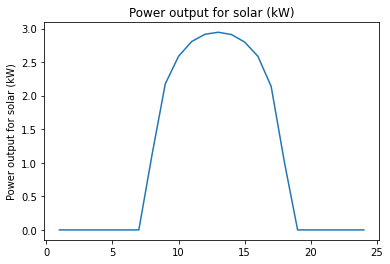

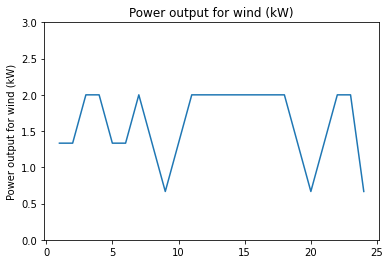

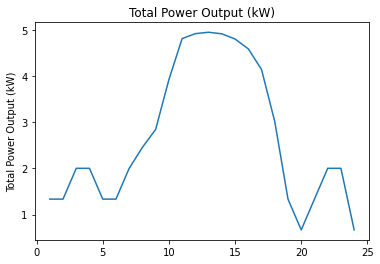

In [7]:
plt.plot(loc_data['Time'], loc_data['Solar Power (kW)'])
plt.ylabel('Power output for solar (kW)')
plt.title('Power output for solar (kW)')
plt.show()

plt.plot(loc_data['Time'], loc_data['Wind Power (kW)'])
plt.ylabel('Power output for wind (kW)')
plt.title('Power output for wind (kW)')
plt.ylim(0, 3)
plt.show()

plt.plot(loc_data['Time'], loc_data['Solar Power (kW)'] + loc_data['Wind Power (kW)'])
plt.ylabel('Total Power Output (kW)')
plt.title('Total Power Output (kW)')
plt.show()

##Utility function for graphs of Load, Generation, power supplied to the battery and power taken from the Grid

In [8]:
def analyze_day(load, loc_data, title):

    generation = loc_data['Solar Power (kW)'] + loc_data['Wind Power (kW)']
    battery = [0]*24
    grid = [0]*24
    plt.xlabel('Time')
    plt.ylabel('Power (kW)')
    plt.plot(load, 'r')
    plt.plot(generation, 'g')
    
    for i in range(24):
            if load[i] > generation[i]:
                grid[i] = load[i] - generation[i]
            if load[i] < generation[i]:
                battery[i] = generation[i] - load[i]
                
    plt.plot(battery, 'b')
    plt.plot(grid, 'y')
    plt.legend(['Load', 'Generation', 'Battery', 'Grid'])
    plt.title(title)
    plt.show()

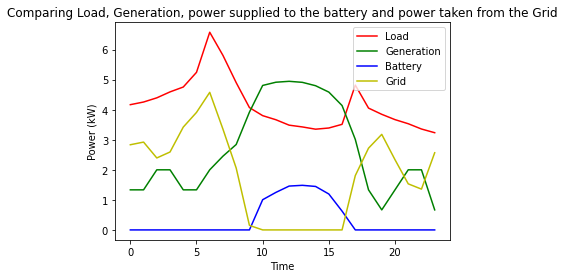

In [9]:
d = 64
analyze_day(Total[(24*d):(24*(d+1))], loc_data, 'Comparing Load, Generation, power supplied to the battery and power taken from the Grid')

Winter

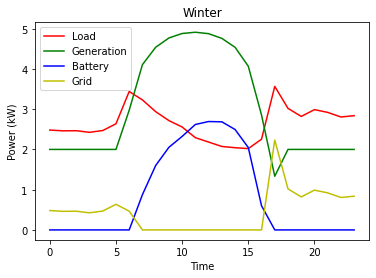

In [10]:
loc_winter = pd.read_csv('seasons/winter.csv')
gen_loc(loc_winter)
d=350
load = Total[(24*d):(24*(d+1))]
analyze_day(load, loc_winter, 'Winter')

Summer

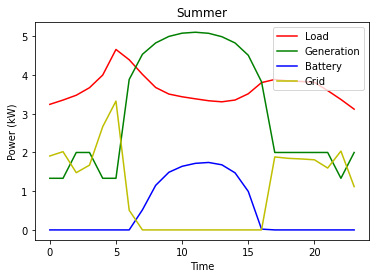

In [11]:
loc_summer = pd.read_csv('seasons/summer.csv')
gen_loc(loc_summer)
d=152
load = Total[(24*d):(24*(d+1))]
analyze_day(load, loc_summer, 'Summer')

Monsoon

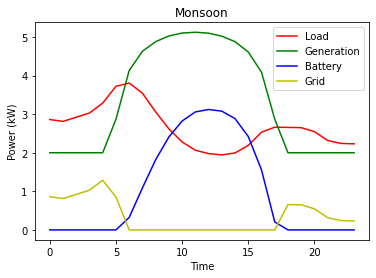

In [12]:
loc_monsoon = pd.read_csv('seasons/monsoon.csv')
gen_loc(loc_monsoon)
d=97
load = Total[(24*d):(24*(d+1))]
analyze_day(load, loc_monsoon, 'Monsoon')

Autumn

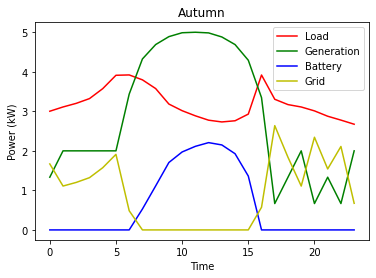

In [13]:
loc_autumn = pd.read_csv('seasons/autumn.csv')
gen_loc(loc_autumn)
d=296
load = Total[(24*d):(24*(d+1))]
analyze_day(load, loc_autumn, 'Autumn')

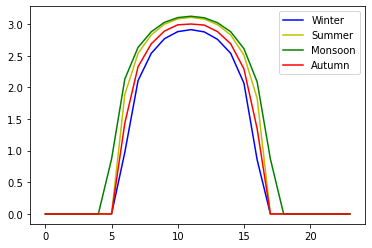

In [14]:
plt.plot(loc_winter['Solar Power (kW)'], 'b')
plt.plot(loc_summer['Solar Power (kW)'], 'y')
plt.plot(loc_monsoon['Solar Power (kW)'], 'g')
plt.plot(loc_autumn['Solar Power (kW)'], 'r')
plt.legend(['Winter', 'Summer', 'Monsoon', 'Autumn'])
plt.show()